In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [3]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [5]:
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
#tradeable

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [6]:
list_of_tickers = ["SPY", "AGG"]
tickers = ["SPY", "AGG"]
# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2019-11-29 00:00:00-05:00  113.01  113.0200  112.85  112.925  2105467  314.86   
2019-12-02 00:00:00-05:00  112.31  112.5100  112.29  112.480  5731792  314.59   
2019-12-03 00:00:00-05:00  112.80  113.1277  112.76  113.020  3547417  308.65   
2019-12-04 00:00:00-05:00  112.87  112.9500  112.68  112.800  3547118  310.70   
2019-12-05 00:00:00-05:00  112.58  112.7400  112.53  112.690  3052489  312.23   

                                                             
                             high     low   close    volume  
time                                                         
2019-11-29 00:00:00-05:00  315.13  314.06  314.27  24392905  
2019-12-02 00:00:00-05:00  314.66  311.17  311.60  62704749  
2019-12-03 00:00:00-05:00  309.64  307.13  309.47  62363983  
2019-12-04 00:00:00-05:00  312.12  310.32  311.47  37810887  
2019-12-05 00:00:00-05:00  312.25  310.58  312.05  34436972

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [7]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,AGG,SPY
,close,close
time,,
2019-11-29 00:00:00-05:00,112.925,314.27
2019-12-02 00:00:00-05:00,112.480,311.60
2019-12-03 00:00:00-05:00,113.020,309.47
2019-12-04 00:00:00-05:00,112.800,311.47
2019-12-05 00:00:00-05:00,112.690,312.05


In [8]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
time,,
2019-11-29 00:00:00-05:00,NaN,NaN
2019-12-02 00:00:00-05:00,-0.003941,-0.008496
2019-12-03 00:00:00-05:00,0.004801,-0.006836
2019-12-04 00:00:00-05:00,-0.001947,0.006463
2019-12-05 00:00:00-05:00,-0.000975,0.001862


In [9]:
# Calculate volatility
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg

0.00042787771551114714

In [10]:
# Use the `std` function to calculate the standard deviation of daily returns for `AGG` and `SPY`, respectively
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_spy

0.03059338886981048

In [11]:
# Save the last day's closing price
# Set last closing prices of `AGG` and `SPY`
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

In [12]:
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [13]:
# Setup the Monte Carlo Parameters
number_simulations = 500
num_trading_days = 252 * 30
monte_carlo = pd.DataFrame()

In [14]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% AGG; 40% SPY)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000804,0.996506,0.990649,1.011088,1.030802,0.988365,0.996923,1.028637,1.001164,0.985791,...,1.004350,0.976970,1.006924,1.004504,0.987592,1.007680,0.999538,1.010936,0.995244,0.983114
2,1.022726,1.007165,0.999905,0.986506,1.025053,0.980105,0.983750,1.004126,0.996903,0.983156,...,1.012756,0.983862,1.010529,1.012169,0.988834,0.974988,0.999885,1.005579,0.988000,0.993474
3,1.018537,1.003861,1.000456,0.984531,1.017833,0.963749,0.993959,0.983603,0.994645,1.006468,...,1.013155,0.968462,1.013338,1.021955,0.972264,0.978708,1.013812,0.991394,0.994218,1.001671
4,1.036266,1.009409,1.007788,0.996905,1.031512,0.966682,1.003514,0.965366,1.001996,1.009886,...,1.005737,0.974297,1.011795,1.007611,0.977793,0.973106,1.001640,0.997402,0.990738,1.003662


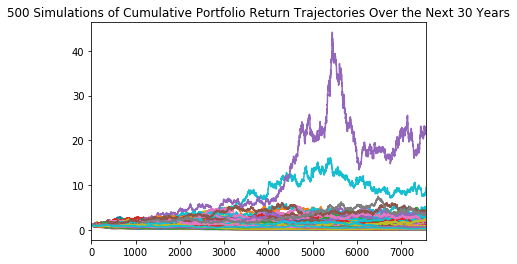

In [15]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [16]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.417533
1    0.278338
2    0.369449
3    0.202352
4    0.349825
Name: 7560, dtype: float64

In [17]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-10, :]
ending_cumulative_returns.head()

0    0.412917
1    0.287047
2    0.337694
3    0.201915
4    0.362629
Name: 7551, dtype: float64

In [18]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.065721
0.95    2.298692
Name: 7551, dtype: float64

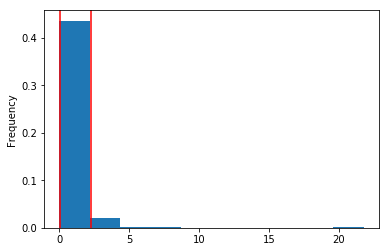

In [45]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [58]:
# Display the 10% confidence interval for the ending returns
#confidence_interval = ending_cumulative_returns.quantile(q=[0.95, 0.05])
#confidence_interval

ten_percentile=np.percentile(ending_cumulative_returns,10)
ten_percentile

0.08817054884028126

In [59]:
# Display the 50% confidence interval for the ending returns
#confidence_interval = ending_cumulative_returns.quantile(q=[0.5, 0.5])
#confidence_interval

fifty_percentile=np.percentile(ending_cumulative_returns,50)
fifty_percentile

0.40545280881185186

In [61]:
# Display the 90% confidence interval for the ending returns
#confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
#confidence_interval

ninety_percentile=np.percentile(ending_cumulative_returns,90)
ninety_percentile

1.532831540381979

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [62]:
# Set initial investment
initial_investment = 20000

#expected_return10

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval.iloc[1])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval.iloc[0])
                                                    
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 252 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 252 trading days will end within in the range of $21314.41855663694 and $65973.8437031824


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [49]:
# YOUR CODE HERE
.04 * (initial_investment * ending_cumulative_returns.quantile(.1))

70.53643907222501

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [55]:
# YOUR CODE HERE
.04 * ((initial_investment * 1.5) * ending_cumulative_returns.quantile(.1))

105.80465860833752

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [31]:
print("kevin")

kevin


In [32]:
print("Brian")

Brian


In [ ]:
#client = client.Income.get(access_token)
#client.head()